# Global Shark Attacks

Data compiled by the global shark attack file extracted from: https://www.kaggle.com/datasets/teajay/global-shark-attacks/data

___

In [3]:
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

In [4]:
zf = zipfile.ZipFile('../data/archive.zip')

In [27]:
archivo = zf.open('attacks.csv')

In [28]:
raw_data = pd.read_csv(archivo, encoding='latin1')

In [1196]:
df = raw_data.copy()

In [1197]:
def shape(df):
    """
    Recibe una DataFrame y devuelve una frase que compara como han cambiado las dimensiones
    """
    return f"Started: {raw_data.shape}, Now: {df.shape}"

In [1198]:
shape(df)

'Started: (25723, 24), Now: (25723, 24)'

In [1199]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


# Data Cleansing

This stage include:

* 01 - Duplicated rows
* 02 - NaN values
* 03 - Low Variance columns
* 04 - Constant columns
* 05 - Special characters
* 06 - Incorrect values
* 07 - Outliers
* 08 - Duplicated rows II
* 09 - Data types
* 10 - Save the clean document

_____

## 01 - Duplicated rows

In [1200]:
df.duplicated().any()

True

In [1201]:
df.drop_duplicates(inplace=True)

In [1202]:
df.duplicated().any()

False

In [1203]:
shape(df)

'Started: (25723, 24), Now: (6312, 24)'

_____

## 02 - NaN values

In [1204]:
def nan(df):
    """
    Recibe una DataFrame y devuelve una lista de columnas y el número de NaN
    """
    return df.isna().sum().sort_values(ascending = False)

In [1205]:
nan(df)

Unnamed: 22               6311
Unnamed: 23               6310
Time                      3364
Species                   2848
Age                       2841
Sex                        575
Activity                   554
Location                   550
Fatal (Y/N)                549
Area                       465
Name                       220
Country                     60
Injury                      38
Investigator or Source      27
Type                        14
Year                        12
href formula                11
Date                        10
pdf                         10
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Case Number                  2
dtype: int64

In [1206]:
def view_nan(df: pd.DataFrame) -> None:
    """
    Recibe una DataFrame y devuelve un plot con los NaN de cada columna
    """
    plt.figure(figsize=(10, 6), facecolor='none') 
    sns.heatmap(df.isna(),           
                yticklabels=False,  
                cmap='magma',     
                cbar=False)
    plt.show();

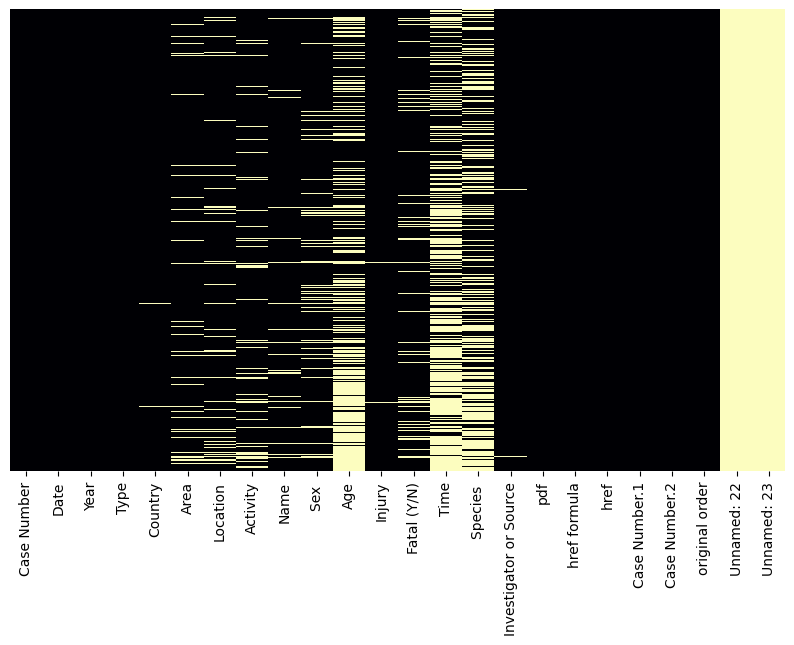

In [1207]:
view_nan(df)

### 'Unnamed: 22' & 'Unnamed: 23' columns

In [1208]:
df['Unnamed: 22'].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [1209]:
df['Unnamed: 23'].value_counts()

Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64

In [1210]:
df['Unnamed: 22'].fillna('unknown', inplace=True)

In [1211]:
df['Unnamed: 23'].fillna('unknown', inplace=True)

In [1212]:
nan(df).head(1)

Time    3364
dtype: int64

### 'Time' column

In [1213]:
len(df['Time'].unique())

367

In [1214]:
# df['Time'].str.replace(r"\d", "", regex=True).value_counts()

In [1215]:
df['Time'].fillna('unknown', inplace=True)

In [1216]:
nan(df).head(1)

Species     2848
dtype: int64

### 'Species' column

Because I did not found the column using 'Species', I decided to remove all the empty spaces from the column names

In [1217]:
df.columns = df.columns.str.strip()

In [1218]:
df.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,unknown,unknown


In [1219]:
len(df['Species'].unique())

1550

In [1220]:
df['Species'].fillna('unknown', inplace=True)

In [1221]:
nan(df).head(1)

Age    2841
dtype: int64

### 'Age' column

In [1222]:
df['Age'].fillna('unknown', inplace=True)

In [1223]:
nan(df).head(1)

Sex    575
dtype: int64

### 'Sex' column

In [1224]:
df['Sex'].fillna('X', inplace=True)

In [1225]:
nan(df).head(1)

Activity    554
dtype: int64

### 'Activity' column

In [1226]:
df['Activity'].fillna('unknown', inplace=True)

In [1227]:
nan(df).head(1)

Location    550
dtype: int64

### 'Location' column

In [1228]:
df['Location'].fillna('unknown', inplace=True)

In [1229]:
nan(df).head(1)

Fatal (Y/N)    549
dtype: int64

### 'Fatal (Y/N)' column

In [1230]:
df['Fatal (Y/N)'].fillna('UNKNOWN', inplace=True)

In [1231]:
nan(df).head(1)

Area    465
dtype: int64

### 'Area' column

In [1232]:
df['Area'].fillna('unknown', inplace=True)

In [1233]:
nan(df).head(1)

Name    220
dtype: int64

### 'Name' column

In [1234]:
df['Name'].fillna('unknown', inplace=True)

In [1235]:
nan(df).head(1)

Country    60
dtype: int64

### 'Country' column

In [1236]:
df['Country'].fillna('unknown', inplace=True)

In [1237]:
nan(df).head(1)

Injury    38
dtype: int64

### 'Injury' column

In [1238]:
df['Injury'].fillna('unknown', inplace=True)

In [1239]:
nan(df).head(1)

Investigator or Source    27
dtype: int64

### 'Investigator or Source' column

In [1240]:
df['Investigator or Source'].fillna('unknown', inplace=True)

In [1241]:
nan(df).head(1)

Type    14
dtype: int64

### 'Type' column

In [1242]:
df['Type'].fillna('unknown', inplace=True)

In [1243]:
nan(df).head(1)

Year    12
dtype: int64

### 'Year' column

In [1244]:
df[df['Year'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,unknown,Spearfishing,Kerry Daniel,M,...,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,unknown,unknown
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,unknown,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,unknown,unknown
6302,0,NaN,NaN,unknown,unknown,unknown,unknown,unknown,unknown,X,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,6304.0,unknown,unknown
6303,0,NaN,NaN,unknown,unknown,unknown,unknown,unknown,unknown,X,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,6305.0,unknown,unknown
6304,0,NaN,NaN,unknown,unknown,unknown,unknown,unknown,unknown,X,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,6306.0,unknown,unknown
6305,0,NaN,NaN,unknown,unknown,unknown,unknown,unknown,unknown,X,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,6307.0,unknown,unknown
6306,0,NaN,NaN,unknown,unknown,unknown,unknown,unknown,unknown,X,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,6308.0,unknown,unknown
6307,0,NaN,NaN,unknown,unknown,unknown,unknown,unknown,unknown,X,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,6309.0,unknown,unknown
6308,0,NaN,NaN,unknown,unknown,unknown,unknown,unknown,unknown,X,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,6310.0,unknown,unknown
6309,0,NaN,NaN,unknown,unknown,unknown,unknown,unknown,unknown,X,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown


In [1245]:
df.loc[187, 'Year'] = 2017
df.loc[6079, 'Year'] = 1836

In [1246]:
bad_index = df[df['Year'].isna()].index

In [1247]:
df.drop(index=bad_index, inplace=True)

In [1248]:
nan(df).head()

Case Number       1
href formula      1
Date              0
Unnamed: 22       0
original order    0
dtype: int64

### Last two columns with NaN...

In [1249]:
df[df['Case Number'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,...,unknown,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0,unknown,unknown


In [1250]:
df.loc[5488, 'Case Number'] = '1905.09.06'

In [1251]:
df['href'][df['href formula'].isna()]

3244    http://sharkattackfile.net/spreadsheets/pdf_di...
Name: href, dtype: object

In [1252]:
df.loc[3244, 'href formula'] = df.loc[3244, 'href']

In [1253]:
nan(df).head()

Case Number       0
Date              0
Unnamed: 22       0
original order    0
Case Number.2     0
dtype: int64

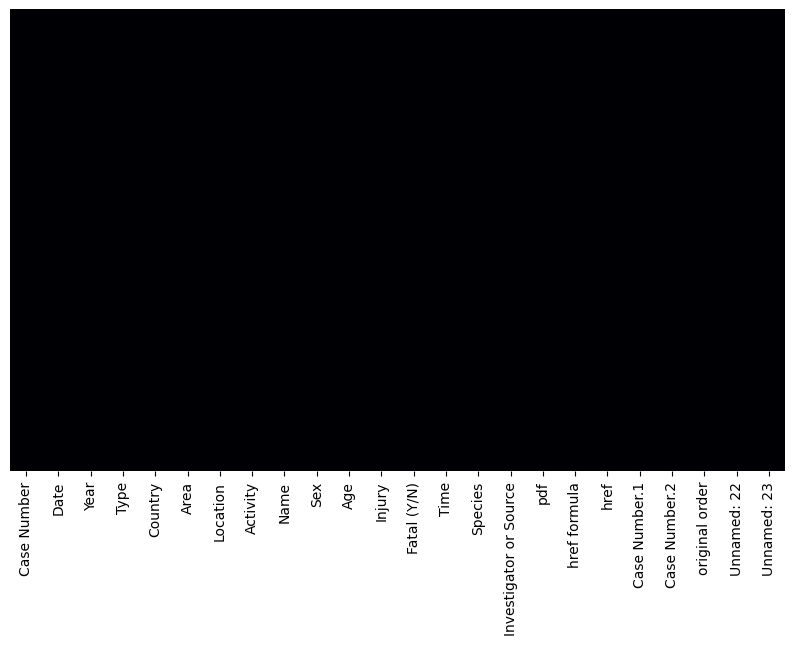

In [1254]:
view_nan(df)

____

## 03 - Low Variance columns

In [1255]:
low_variance = []

for col in df.select_dtypes(include = np.number): 
    
    minimo = df[col].min()
    maximo = df[col].max()
    
    per_90 = np.percentile(df[col], 90)
    per_10 = np.percentile(df[col], 10)
    
    if minimo == per_90 or maximo == per_10:
        low_variance.append(col)
        
low_variance

[]

_____

## 04 - Constant columns

In [1256]:
cte_cols = []

for col in df.select_dtypes(include = np.number):
    
    if len(df[col].unique()) == 1:
        cte_cols.append(col)
        
cte_cols

[]

In [1257]:
cte_str_cols = []

for col in df.select_dtypes(include = 'object'):
    
    if len(df[col].unique()) == 1:
        cte_str_cols.append(col)
          
cte_str_cols

[]

_____

## 05 - Special characters

In [1258]:
# patron = r'[?¿*$%&]'

# def find_special_chars(df):
#     for col in df.select_dtypes(include = 'object').columns:
#         for i in range(len(df)):
#             value = df.loc[i, col]
#             weird_chars = re.findall(patron, value)
#             if weird_chars:
#                 print(f"Columna: {col} | Fila: {i} | Caracteres raros: {weird_chars}")

# find_special_chars(df)

In [1259]:
# df.replace('&', 'and', regex=True, inplace=True)

In [1260]:
# find_special_chars(df)

____

## 06 - Incorrect values

In [1261]:
def unique_values(df):
    return sorted([(col, len(df[col].unique())) for col in df.columns], key=lambda x: x[1])

In [1262]:
unique_values(df)

[('Unnamed: 22', 2),
 ('Unnamed: 23', 3),
 ('Sex', 7),
 ('Fatal (Y/N)', 8),
 ('Type', 9),
 ('Age', 158),
 ('Country', 213),
 ('Year', 249),
 ('Time', 367),
 ('Area', 826),
 ('Activity', 1533),
 ('Species', 1550),
 ('Injury', 3737),
 ('Location', 4109),
 ('Investigator or Source', 4970),
 ('Name', 5230),
 ('Date', 5433),
 ('href', 6285),
 ('Case Number.1', 6285),
 ('Case Number', 6286),
 ('Case Number.2', 6286),
 ('pdf', 6291),
 ('href formula', 6291),
 ('original order', 6301)]

### 'Unnamed: 22' & 'Unnamed: 23' columns

In [1263]:
df['Unnamed: 22'].value_counts()

unknown         6301
stopped here       1
Name: Unnamed: 22, dtype: int64

In [1264]:
df.loc[df['Unnamed: 22'] == 'stopped here']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,...,unknown,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,unknown


In [1265]:
df['Unnamed: 23'].value_counts()

unknown            6300
Teramo                1
change filename       1
Name: Unnamed: 23, dtype: int64

In [1266]:
df.loc[df['Unnamed: 23'] == 'Teramo']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,unknown,Went to aid of child being menaced by the shark,A.J. Eggink,M,...,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,unknown,Teramo


In [1267]:
df.loc[df['Unnamed: 23'] == 'change filename']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,...,unknown,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,unknown,change filename


In [1268]:
df['Comments'] = df['Unnamed: 22'] + df['Unnamed: 23']

In [1269]:
df.drop(['Unnamed: 23', 'Unnamed: 22'], axis = 1, inplace = True)

In [1270]:
df.replace('unknownunknown', 'none', regex=True, inplace=True)

### 'Sex' column

In [1271]:
df['Sex'] = df['Sex'].str.strip()

In [1272]:
df['Sex'].value_counts()

M      5096
F       637
X       565
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [1273]:
def clean_sex(x):
    if 'N' in x:
        return 'X'
    elif 'lli' in x:
        return 'X'
    elif '.' in x:
        return 'X'
    else:
        return x

In [1274]:
df['Sex'] = df['Sex'].apply(clean_sex)

In [1275]:
df['Sex'].value_counts()

M    5096
F     637
X     569
Name: Sex, dtype: int64

### 'Fatal (Y/N)' column

In [1276]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.strip()

In [1277]:
df['Fatal (Y/N)'].value_counts()

N          4301
Y          1388
UNKNOWN     610
M             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [1278]:
fatal_index = df[(df['Injury'].str.contains('atal' or 'dead')) & (df['Fatal (Y/N)'] == 'UNKNOWN')].index

In [1279]:
df.loc[fatal_index, 'Fatal (Y/N)'] = 'Y'

In [1280]:
df['Fatal (Y/N)'].value_counts()

N          4301
Y          1401
UNKNOWN     597
M             1
2017          1
y             1
Name: Fatal (Y/N), dtype: int64

In [1281]:
def clean_fatal(x):
    if 'M' in x:
        return 'N'
    elif '2017' in x:
        return 'UNKNOWN'
    elif 'y' in x:
        return 'Y'
    else:
        return x

In [1282]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].apply(clean_fatal)

In [1283]:
df['Fatal (Y/N)'].value_counts()

N          4302
Y          1402
UNKNOWN     598
Name: Fatal (Y/N), dtype: int64

### 'Type' column

In [1284]:
df['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
unknown            4
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [1285]:
def clean_type(x):
    x = x.lower()
    if 'boat' in x:
        return 'Boating'
    elif 'quest' in x:
        return 'unknown'
    elif 'unk' in x:
        return 'unknown'
    else:
        return x.title()

In [1286]:
df['Type'] = df['Type'].apply(clean_type)

In [1287]:
df['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Boating          341
Sea Disaster     239
unknown            6
Name: Type, dtype: int64

### 'Age' column

In [1288]:
df['Age'] = df['Age'].str.strip()

In [1289]:
df['Age'].unique()

array(['57', '11', '48', 'unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '40', '13', '42', '3',
       '8', '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '', '30 or 36', '6½', '21 & ?', '75', '33 or 37',
       'mid-30s', '23 & 20', '7      &    31', '20?', "60's", '32 & 30',
       '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '21 or 26',
       '>50', '18 to 22', 'adult', '9 & 12', '? & 19', '9 months',
       '25 to 35', '23 & 26', '1', '(adult)', '33 & 37', '25

In [1290]:
def extract_number(x):
    num = re.findall('\d+', x)
    if num:         
        return int(num[0])
    else:
        return 0

In [1291]:
df['Age_years'] = df['Age'].apply(extract_number)

In [1292]:
df['Age_years'].unique()

array([57, 11, 48,  0, 18, 52, 15, 12, 32, 10, 21, 34, 30, 60, 33, 29, 54,
       41, 37, 56, 19, 25, 69, 38, 55, 35, 46, 45, 14, 40, 28, 20, 24, 26,
       49, 22,  7, 31, 17, 13, 42,  3,  8, 50, 16, 82, 73, 68, 51, 39, 58,
       47, 61, 65, 36, 66, 43,  9, 72, 59,  6, 27, 64, 23, 71, 44, 62, 63,
       70, 53, 77, 74,  5, 86, 84, 75, 87, 67,  1,  2, 81, 78],
      dtype=int64)

In [1293]:
df['Age'].unique()

array(['57', '11', '48', 'unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '40', '13', '42', '3',
       '8', '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '', '30 or 36', '6½', '21 & ?', '75', '33 or 37',
       'mid-30s', '23 & 20', '7      &    31', '20?', "60's", '32 & 30',
       '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33', '21 or 26',
       '>50', '18 to 22', 'adult', '9 & 12', '? & 19', '9 months',
       '25 to 35', '23 & 26', '1', '(adult)', '33 & 37', '25

### Clasificar las edades por categorías

    Categoría	Rango de edad
        Child	0-12 años
        Teen	13-19 años
        Young	20-39 años
        Adult	40-64 años
        Elder	65 años o más

In [1294]:
child_index = df[(df['Age_years'] > 0) & (df['Age_years'] < 13)].index
teen_index = df[(df['Age_years'] > 13) & (df['Age_years'] < 20)].index
young_index = df[(df['Age_years'] > 20) & (df['Age_years'] < 40)].index
adult_index = df[(df['Age_years'] > 40) & (df['Age_years'] < 64)].index
elder_index = df[(df['Age_years'] > 65)].index

In [1295]:
df.loc[child_index, 'Age'] = 'Child'
df.loc[teen_index, 'Age'] = 'Teen'
df.loc[young_index, 'Age'] = 'Young'
df.loc[adult_index, 'Age'] = 'Adult'
df.loc[elder_index, 'Age'] = 'Elder'

In [1296]:
df['Age'].unique()

array(['Adult', 'Child', 'unknown', 'Teen', 'Young', 'Elder', '40s', '20',
       '40', '13', '20s', '65', '64', 'teen', 'Teens', '', '20?',
       'Elderly', 'mid-20s', 'adult', '(adult)', 'X', '"middle-age"',
       '13 or 18', 'MAKE LINE GREEN', '"young"', 'F', 'young', 'A.M.',
       '13 or 14'], dtype=object)

In [1297]:
df['Age'].str.replace(r"\d", "", regex=True).value_counts()

unknown            2831
Young              1411
Teen                841
Adult               541
                    305
Child               293
Elder                49
s                    10
teen                  5
young                 2
 or                   2
"middle-age"          1
F                     1
"young"               1
MAKE LINE GREEN       1
Elderly               1
X                     1
(adult)               1
adult                 1
mid-s                 1
?                     1
Teens                 1
A.M.                  1
Name: Age, dtype: int64

In [1298]:
def clean_age(x):
    try:
        x = int(x)
        if x in range(0, 13):   
            return 'Child'
        elif x in range(13, 20):
            return 'Teen'
        elif x in range(20, 40):
            return 'Young'
        elif x in range(40, 65):
            return 'Adult'
        elif x in range(65, 150):
            return 'Elder'
        else:
            return x
    except:
        x = x.lower()
        if 'child' in x:
            return 'Child'
        if 'month' in x:
            return 'Child'
        elif 'teen' in x:
            return 'Teen'
        elif 'youn' in x:
            return 'Young'
        elif 'adult' in x:
            return 'Adult'
        elif 'elde' in x:
            return 'Elder'
        elif 'iddle' in x:
            return 'Adult'       
        elif '40s' in x:
            return 'Adult'
        elif '20s' in x:
            return 'Young'
        elif '' in x:
            return 'unknown'
        elif '20?' in x:
            return 'Young'
        elif 'mid-20s' in x:
            return 'Young'
        elif 'x' in x:
            return 'unknown'
        elif '13 or 18' in x:
            return 'Teen'
        elif 'make line green' in x:
            return 'unknown'
        elif 'f' in x:
            return 'unknown'
        elif 'a.m.' in x:
            return 'unknown'
        elif '13 or 14' in x:
            return 'Teen'
        else:
            return x

In [1299]:
df['Age'] = df['Age'].apply(clean_age)

In [1300]:
df['Age'].value_counts()

unknown    2842
Young      1564
Teen        941
Adult       607
Child       293
Elder        55
Name: Age, dtype: int64

### 'Country' column

In [1301]:
len(df['Country'].unique())

213

In [1302]:
df['Country'].value_counts()

USA                      2229
AUSTRALIA                1338
SOUTH AFRICA              579
PAPUA NEW GUINEA          134
NEW ZEALAND               128
                         ... 
THE BALKANS                 1
NORTH ATLANTIC OCEAN        1
MAYOTTE                     1
GABON                       1
CEYLON (SRI LANKA)          1
Name: Country, Length: 213, dtype: int64

In [1303]:
df['Country'] = df['Country'].str.strip()

In [1304]:
countries = ['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA', 'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 
             'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM',
             'BELIZE', 'BENIN', 'BHUTAN', 'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BRAZIL', 'BRUNEI', 'BULGARIA',
             'BURKINA FASO', 'BURUNDI', 'CAMBODIA', 'CAMEROON', 'CANADA', 'CAPE VERDE', 'CENTRAL AFRICAN REPUBLIC', 'CHAD',
             'CHILE', 'CHINA', 'COLOMBIA', 'COMOROS', 'CONGO, DEMOCRATIC REPUBLIC OF THE', 'CONGO, REPUBLIC OF THE', 
             'COSTA RICA', 'IVORY COAST', 'CROATIA', 'CUBA', 'CYPRUS', 'CZECH REPUBLIC', 'DENMARK', 'DJIBOUTI', 'DOMINICA',
             'DOMINICAN REPUBLIC', 'EAST TIMOR', 'ECUADOR', 'EGYPT', 'EL SALVADOR', 'ENGLAND', 'EQUATORIAL GUINEA', 'ERITREA',
             'ESTONIA', 'ESWATINI', 'ETHIOPIA', 'FEDERATED STATES OF MICRONESIA', 'FIJI', 'FINLAND', 'FRANCE', 'GABON',
             'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREECE', 'GRENADA', 'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA',
             'HAITI', 'HONDURAS', 'HUNGARY', 'ICELAND', 'INDIA', 'INDONESIA', 'IRAN', 'IRAQ', 'IRELAND', 'ISRAEL', 'ITALY',
             'JAMAICA', 'JAPAN', 'JORDAN', 'KAZAKHSTAN', 'KENYA', 'KIRIBATI', 'KOSOVO', 'KUWAIT', 'KYRGYZSTAN', 'LAOS', 
             'LATVIA', 'LEBANON', 'LESOTHO', 'LIBERIA', 'LIBYA', 'LIECHTENSTEIN', 'LITHUANIA', 'LUXEMBOURG', 'MADAGASCAR',
             'MALAWI', 'MALAYSIA', 'MALDIVES', 'MALI', 'MALTA', 'MARSHALL ISLANDS', 'MAURITANIA', 'MAURITIUS', 'MEXICO',
             'MOLDOVA', 'MONACO', 'MONGOLIA', 'MONTENEGRO', 'MOROCCO', 'MOZAMBIQUE', 'MYANMAR', 'NAMIBIA', 'NAURU', 'NEPAL',
             'NETHERLANDS', 'NEW ZEALAND', 'NICARAGUA', 'NIGER', 'NIGERIA', 'NORTH KOREA', 'MACEDONIA', 'NORTHERN IRELAND',
             'NORWAY', 'OMAN', 'PAKISTAN', 'PALAU', 'PANAMA', 'PAPUA NEW GUINEA', 'PARAGUAY', 'PERU', 'PHILIPPINES', 
             'POLAND', 'PORTUGAL', 'PUERTO RICO', 'QATAR', 'ROMANIA', 'RUSSIA', 'RWANDA', 'SAINT KITTS AND NEVIS', 
             'SAINT LUCIA', 'SAINT VINCENT AND THE GRENADINES', 'SAMOA', 'SAN MARINO', 'SAO TOME AND PRINCIPE', 'SAUDI ARABIA',
             'SCOTLAND', 'SENEGAL', 'SERBIA', 'SEYCHELLES', 'SIERRA LEONE', 'SINGAPORE', 'SLOVAKIA', 'SLOVENIA', 
             'SOLOMON ISLANDS', 'SOMALIA', 'SOUTH AFRICA', 'SOUTH KOREA', 'SOUTH SUDAN', 'SPAIN', 'SRI LANKA', 'SUDAN',
             'SURINAME', 'SWEDEN', 'SWITZERLAND', 'SYRIA', 'TAIWAN', 'TAJIKISTAN', 'TANZANIA', 'THAILAND', 'TOGO', 'TONGA',
             'TRINIDAD AND TOBAGO', 'TUNISIA', 'TURKEY', 'TURKMENISTAN', 'TUVALU', 'UGANDA', 'UKRAINE', 'UNITED ARAB EMIRATES',
             'UNITED KINGDOM', 'UNITED STATES', 'URUGUAY', 'UZBEKISTAN', 'VANUATU', 'VATICAN CITY', 'VENEZUELA', 'VIETNAM',
             'WALES', 'YEMEN', 'ZAMBIA', 'ZIMBABWE']

In [1305]:
# print(len(df['Country'].unique()), len(countries), len(df['Country']) == len(countries))

In [1306]:
def clean_countries(x):
    x = x.upper()
    if any(i in x for i in countries):
        return i.title()
    elif 'USA' in x:
        return 'United States'
    elif 'OCEAN' in x:
        return 'ocean'
    elif 'SEA' in x:
        return 'ocean'
    elif '?' in x:
        return 'unknown'
    elif 'FRE' in x:
        return 'France'
    elif 'CALED' in x:
        return 'France'
    elif 'REUNI' in x:
        return 'France'
    elif 'COLUM' in x:
        return 'Colombia'
    elif x == 'UNKNOWN':
        return 'unknown'
    else:
        return x

In [1307]:
# df['Country'] = df['Country'].apply(clean_countries)

In [1308]:
# df['Country'].unique()

In [1309]:
# country_table = list(df['Country'].unique())

In [1310]:
# other_country_names = [i for i in country_table if i.upper() not in countries]

In [1311]:
# other_country_names

### 'Year' column

In [1312]:
df['Year'].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986., 1985.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [1313]:
df['Year'].value_counts().sort_index()

0.0       125
5.0         1
77.0        1
500.0       1
1543.0      1
         ... 
2014.0    127
2015.0    143
2016.0    130
2017.0    137
2018.0     53
Name: Year, Length: 249, dtype: int64

In [1314]:
def clean_year(x):
    if x == 5.0:
        return 0
    elif x == 77.0:
        return 0
    elif x == 500.0:
        return 0
    else:
        return x

In [1315]:
df['Year'] = df['Year'].apply(clean_year)

In [1316]:
df['Year'].value_counts().sort_index()

0.0       128
1543.0      1
1554.0      1
1555.0      1
1580.0      1
         ... 
2014.0    127
2015.0    143
2016.0    130
2017.0    137
2018.0     53
Name: Year, Length: 246, dtype: int64

### 'Time' column

In [1317]:
df['Time'].value_counts()

unknown        3354
Afternoon       187
11h00           128
Morning         121
12h00           109
               ... 
14h37             1
10h07             1
13h53             1
13h23             1
19h00-20h00       1
Name: Time, Length: 367, dtype: int64

In [1320]:
df['Time'] = df['Time'].str.strip()

### Clasificar el tiempo por categorías

    Categoría	Rango 
    Morning: From 6:00 to 12:00
    Afternoon: From 12:00 to 18:00
    Evening: From 18:00 to 24:00
    Night: From 0:00 to 6:00

In [1383]:
def clean_time(x):
    if re.match(r"\d\x68\d", x):
        x = x.replace('h', '')
        x = int(x[0:2])
        if x in range(0, 24):
            if x in range(6, 13):   
                return 'Morning'
            elif x in range(12, 19):
                return 'Afternoon'
            elif x in range(18, 25):
                return 'Evening'
            elif x in range(0, 7):
                return 'Night'
        else:
            pass
    else:
        return x

# def clean_time(x):
#     if re.match(r"\d\h\d", x):
#         print(x)
#         x = x.replace('h', '')
#         try:
#             x = int(x[0:2])
#             if x in range(6, 13):   
#                 return 'Morning'
#             elif x in range(12, 19):
#                 return 'Afternoon'
#             elif x in range(18, 25):
#                 return 'Evening'
#             elif x in range(0, 7):
#                 return 'Night'
#             else:
#                 pass
#         except:
#             x = int(x[0:1])
#             if x in range(6, 13):   
#                 return 'Morning'
#             elif x in range(12, 19):
#                 return 'Afternoon'
#             elif x in range(18, 25):
#                 return 'Evening'
#             elif x in range(0, 7):
#                 return 'Night'
#             else:
#                 pass
#     else:
#         x = x.lower()
#         if 'after' in x:
#             return 'Afternoon'
#         elif 'morn' in x:
#             return 'Morning'
#         elif 'eve' in x:
#             return 'Evening'
#         elif 'ni' in x:
#             return 'Night'
#         elif 'day' in x:
#             return 'Morning'
#         else:
#             return x

In [1384]:
clean_time('07h08')

'07h08'

In [1374]:
# df['Time'] = df['Time'].apply(clean_time)

In [1375]:
# df['Time'].value_counts()

In [1376]:
# df['Time'].unique()

### 'Area' column

In [1380]:
df['Area'].unique()

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall', 'Westerm Australia', 'Eastern Cape Province',
       'Hua Hin', 'Cocos Island', 'Western Australia',
       'Alifu Alifu Atoll', 'Western Cape Province', 'New Providence',
       'Alagoas', 'unknown', 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'Pamplemousses ', 'South Australia',
       'North Island', 'New York', 'Canary Islands', ' Upolu Island',
       'Shizuoka Prefecture', 'Texas', 'Castellón', 'Massachusetts',
       'Red Sea Protectorate', 'New Providence District',
       '40 miles off Grand Bahama Island', 'Ascension Island',
       'New Jersey', 'Majorca', 'Washington', 'Tabasco', 'Anjouan',
       'Ibiza Island', 'Marquesas', 'South Devon', 'New Providence ',
       'Sharjah, ', 'Baja California Sur', 'Saint-Leu', 'South Island


 ('Activity', 1533),
 ('Species', 1550),
 ('Injury', 3737),
 ('Location', 4109),
 ('Investigator or Source', 4970),
 ('Name', 5230),
 ('Date', 5433),
 ('href', 6285),
 ('Case Number.1', 6285),
 ('Case Number', 6286),
 ('Case Number.2', 6286),
 ('pdf', 6291),
 ('href formula', 6291),
 ('original order', 6301)]

## 07 - Outliers

## 08 - Duplicated rows II

## 09 - Data types

In [ ]:
for col in df.select_dtypes('integer'):
    df[col] = pd.to_numeric(df[col], downcast='integer')

## 10 - Save the clean document